In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!curl -O https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4764M  100 4764M    0     0  19.2M      0  0:04:07  0:04:07 --:--:-- 20.0M


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Read the dataset
import tarfile
dataset = tarfile.open('food-101.tar.gz')

In [ ]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class','image_file'])

In [ ]:
#Run through tarfile members 
for name in dataset.getnames():
    
    tar_mem = dataset.getmember(name)
    
    #Check if it is a file
    if(tar_mem.isfile() and name.endswith('.jpg')):
        #Build directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        #Add record to the dataframe
        df.loc[df.shape[0]] = [im_class, name]

In [ ]:
#extract data
dataset.extractall(path='')

In [ ]:
!ls -l food-101/images

total 3616
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 apple_pie
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 baby_back_ribs
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 baklava
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beef_carpaccio
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beef_tartare
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beet_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 beignets
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bibimbap
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bread_pudding
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 breakfast_burrito
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 bruschetta
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 caesar_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cannoli
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 caprese_salad
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 carrot_cake
drwxr-xr-x 2 3156 320 36864 Jul  9  2014 ceviche
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cheesecake
drwxr-xr-x 2 3156 320 36864 Sep 21  2013 cheese_plate
drwxr-xr-x 2 3156 320 36864 Sep 21  201

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/food-101/images",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/food-101/images",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


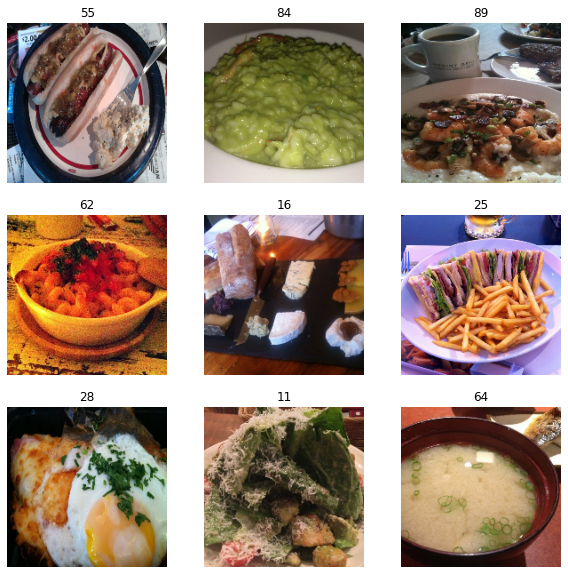

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.to_csv('/content/drive/My Drive/train.csv',index=False)
test_df.to_csv('/content/drive/My Drive/test.csv', index=False)

In [ ]:
#Read training and test Dataframe
train_df = pd.read_csv('/content/drive/My Drive/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
#Check contents
train_df.sample(n=5)

,class,image_file
20234,ice_cream,food-101/images/ice_cream/89027.jpg
13040,garlic_bread,food-101/images/garlic_bread/2939821.jpg
69864,hot_dog,food-101/images/hot_dog/1718694.jpg
66280,peking_duck,food-101/images/peking_duck/2523896.jpg
72557,donuts,food-101/images/donuts/551111.jpg


In [ ]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('Food classes: ', class_names)
len(class_names)

Food classes:  ['dumplings', 'bruschetta', 'churros', 'croque_madame', 'spaghetti_carbonara', 'fried_calamari', 'bread_pudding', 'panna_cotta', 'frozen_yogurt', 'club_sandwich', 'filet_mignon', 'pho', 'chicken_curry', 'sushi', 'ravioli', 'donuts', 'beef_tartare', 'omelette', 'french_onion_soup', 'huevos_rancheros', 'french_fries', 'chocolate_mousse', 'pad_thai', 'beet_salad', 'caesar_salad', 'fish_and_chips', 'cup_cakes', 'breakfast_burrito', 'chicken_quesadilla', 'ramen', 'pulled_pork_sandwich', 'risotto', 'foie_gras', 'hummus', 'ceviche', 'crab_cakes', 'grilled_salmon', 'macaroni_and_cheese', 'carrot_cake', 'seaweed_salad', 'pork_chop', 'nachos', 'peking_duck', 'macarons', 'spaghetti_bolognese', 'tacos', 'samosa', 'caprese_salad', 'chicken_wings', 'paella', 'chocolate_cake', 'baby_back_ribs', 'cheesecake', 'miso_soup', 'onion_rings', 'red_velvet_cake', 'grilled_cheese_sandwich', 'escargots', 'pancakes', 'spring_rolls', 'apple_pie', 'lobster_roll_sandwich', 'baklava', 'french_toast', 

101

In [ ]:
#Define some parameters
img_size = 224
img_depth = 3  

In [ ]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

In [ ]:
#Define Training Data Generator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                preprocessing_function=normalize_data) #Normalize the data accordingly

#Define Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data) #Normalize the data accordingly

In [ ]:
#Training (from dataframe)
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    x_col='image_file', #File path for image
                                                    y_col='class',           #Class for the image
                                                    target_size=(img_size, img_size), #Image resize dimensions
                                                    batch_size=800)

Found 80800 validated image filenames belonging to 101 classes.


In [ ]:
#Test (from dataframe)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  x_col='image_file', #File path for image
                                                  y_col='class',           #Class for the image
                                                  target_size=(img_size, img_size), #Image resize dimensions
                                                  batch_size=800)

Found 20200 validated image filenames belonging to 101 classes.


In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(224,224,3),
                                       weights='imagenet')

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [ ]:
#Unfreezing all layers after layer# 158
#for layer in model.layers[150:]:
 #   layer.trainable = True 

In [ ]:
model.output

<tf.Tensor 'conv5_block3_out/Relu:0' shape=(None, 7, 7, 2048) dtype=float32>

In [ ]:
#get Output layer of Pre0trained model
x = model.output

#Global average pool to reduce number of features and Flatten the output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
#Output shape of Global Average Pooling
x

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 2048) dtype=float32>

In [ ]:
#Add output layer
prediction = tf.keras.layers.Dense(len(class_names),activation='softmax')(x)

In [ ]:
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 101) dtype=float32>

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#How does our overall model looks
final_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/food_resnet.h5', # adreess or location will also work here
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
final_model.fit_generator(train_generator, 
                          epochs=30,
                          steps_per_epoch= 80800//5050, # len(training_size/batch size)
                          validation_data=test_generator,
                          validation_steps = 20200//5050, 
                          callbacks=[model_checkpoint])

Epoch 1/30
16/16 [==============================] - ETA: 0s - loss: 4.0447 - accuracy: 0.1205 
Epoch 00001: val_accuracy improved from -inf to 0.27469, saving model to /content/drive/My Drive/food_resnet.h5
16/16 [==============================] - 278s 17s/step - loss: 4.0447 - accuracy: 0.1205 - val_loss: 3.1754 - val_accuracy: 0.2747
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 2.9064 - accuracy: 0.3283 
Epoch 00002: val_accuracy improved from 0.27469 to 0.38406, saving model to /content/drive/My Drive/food_resnet.h5
16/16 [==============================] - 267s 17s/step - loss: 2.9064 - accuracy: 0.3283 - val_loss: 2.5556 - val_accuracy: 0.3841
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 2.4445 - accuracy: 0.4183 
Epoch 00003: val_accuracy improved from 0.38406 to 0.45625, saving model to /content/drive/My Drive/food_resnet.h5
16/16 [==============================] - 261s 16s/step - loss: 2.4445 - accuracy: 0.4183 - val_loss: 2.2458 - v

# Got validation accuracy of 62%. 
